## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

In [2]:
%%loadFromPOM
<dependency>
    <groupId>org.knowm.xchart</groupId>
    <artifactId>xchart</artifactId>
    <version>3.5.2</version>
</dependency>

In [3]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Helper Methods

Let's code three helper methods:

* random array generator
* array printer
* copyArray

It is assumed that you are fully capable of coding two similar methods by yourself. If you are new to Java (but have some experience with a different language), playing with these methods will help you get familiar with Java faster.

In [4]:
// random array generator
public int[] randomArr(int size) {
    Random r = new Random();
    int[] arr = new int[size];
    
    for (int i = 0; i < size; i++) {
        arr[i] = r.nextInt(1000) + 1;
    }
    
    return arr;
}

// array printer
public void printArr(int[] arr) {
    for (int num : arr) {
        System.out.print(num + " ");
    }
    System.out.println();
}

// array deep copy
public void copyArray(int[] from, int[] to) {
    if (from.length != to.length) {
        System.exit(0);
    }
    
    for (int i = 0; i < from.length; i++) {
        to[i] = from[i];
    }
}

## Time Complexity - maxFind

Here is the maxFind method and its sanity check:

In [5]:
// maxFinder
public int maxFind(int[] arr) {
    int max = arr[0];
    
    for (int num: arr) {
        if (num > max) {
            max = num;
        }
    }
    
    return max;
}

// proof that maxFind works
int[] arr = randomArr(15);
printArr(arr);
System.out.println("The max number is " + maxFind(arr));

110 93 99 9 884 30 993 573 209 218 802 998 902 223 12 
The max number is 998


Let's try to find the relationship between input size (i.e., the length of input array) and the running time of maxFind. Lets modify the maxFind method with a flag. When flag is set to true, the method returns the running time (i.e., steps) it takes to fully execute the method.

In [6]:
// track steps of maxFind
public int maxFindTrack(int[] arr, boolean trackSteps) {
    // init steps
    int steps = 0;
    
    int max = arr[0];
    
    // increment steps
    if (trackSteps) {
        steps++;
    }
    
    for (int num: arr) {
        
        if (num > max) {
            max = num;

            // increment steps
            if (trackSteps) {
                steps++;
            }
        }
        
        // increment steps
        if (trackSteps) {
            steps++;
        }
    }
    
    // increment steps
    if (trackSteps) {
        steps++;
        return steps;
    }
    
    return max;
}

0 3 4 6 7 8 10 11 11 14 14 17 15 19 18 


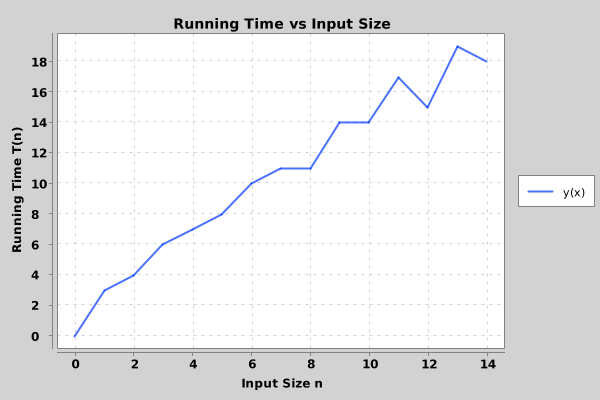

In [7]:
// proof that maxFindTrack works
int size = 15;
int[] steps = new int[size];
for (int i = 1; i < steps.length; i++) {
    int[] arr = randomArr(i);
    steps[i] = maxFindTrack(arr, true);
}
printArr(steps);

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// steps - convert int to double for plotting
double[] yData = new double[size];
for (int i = 0; i < yData.length; i++) {
    yData[i] = steps[i];
}

// plot it
XYChart chart = QuickChart.getChart("Running Time vs Input Size", "Input Size n", "Running Time T(n)", "y(x)", xData, yData);
BitmapEncoder.getBufferedImage(chart);

To quantify the running time of maxFind more accurately, we can further modify maxFind method to deal with the worst case scenario and the best case scenarios:

* worst: an ascending sorted array
* best: a descending sorted array

In [8]:
// track steps of maxFind
public int maxFindTrackUpdate(int[] arr, boolean trackSteps, String condition) {
    // init arr depending on condition
    if (condition.equals("worst")) {
        Arrays.sort(arr);
    }
    
    if (condition.equals("best")) {
        Arrays.sort(arr);
        for (int i = 0; i < arr.length/2; i++) {
            int temp = arr[i];
            arr[i] = arr[arr.length-1];
            arr[arr.length-1] = temp;
        }
    }
    
    // init steps
    int steps = 0;
    
    int max = arr[0];
    
    // increment steps
    if (trackSteps) {
        steps++;
    }
    
    for (int num: arr) {
        
        if (num > max) {
            max = num;

            // increment steps
            if (trackSteps) {
                steps++;
            }
        }
        
        // increment steps
        if (trackSteps) {
            steps++;
        }
    }
    
    // increment steps
    if (trackSteps) {
        steps++;
        return steps;
    }
    
    return max;
}

Let's plot the steps it takes to find max from a randomly generated array with 30 integers for different scenarios.

Best: 0 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
Normal: 0 3 5 6 8 10 8 11 12 12 13 15 16 20 22 17 21 22 21 23 23 24 27 29 28 28 29 31 34 32 
Worst: 0 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 36 39 40 43 45 47 49 51 53 54 56 58 


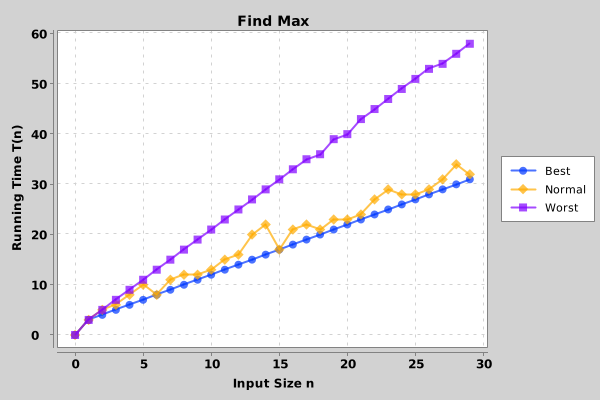

In [9]:
// predetermined size
size = 30;

// storage of steps
int[] best = new int[size];
int[] normal = new int[size];
int[] worst = new int[size];

// populate storage
for (int i = 1; i < size; i++) {
    int[] tempB = randomArr(i);
    int[] tempN = new int[tempB.length];
    copyArray(tempB, tempN);
    int[] tempW = new int[tempB.length];
    copyArray(tempB, tempW);
    
    best[i] = maxFindTrackUpdate(tempB, true, "best");
    normal[i] = maxFindTrackUpdate(tempN, true, "normal");
    worst[i] = maxFindTrackUpdate(tempW, true, "worst");
}


System.out.print("Best: ");
printArr(best);
System.out.print("Normal: ");
printArr(normal);
System.out.print("Worst: ");
printArr(worst);

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// best - convert int to double for plotting
double[] yDataB = new double[size];
for (int i = 0; i < yDataB.length; i++) {
    yDataB[i] = best[i];
}

// normal - convert int to double for plotting
double[] yDataN = new double[size];
for (int i = 0; i < yDataN.length; i++) {
    yDataN[i] = normal[i];
}

// worst - convert int to double for plotting
double[] yDataW = new double[size];
for (int i = 0; i < yDataW.length; i++) {
    yDataW[i] = worst[i];
}

// plot it
XYChart chart = new XYChartBuilder().width(600).height(400).title("Find Max").xAxisTitle("Input Size n").yAxisTitle("Running Time T(n)").build();
chart.addSeries("Best", xData, yDataB);
chart.addSeries("Normal", xData, yDataN);
chart.addSeries("Worst", xData, yDataW);
BitmapEncoder.getBufferedImage(chart);

## Time Complexity - Fibonacci Sequence

There are two ways to implement Fibonacci Sequence:

* recursive
* Iterative

The recursive implementation is a direct translation of its definition. The iterative approach takes advantage of an array to memorize any Fibonacci numbers it ever calculates to avoid redundant computation.

In [10]:
// recursive
public int fibonacciRecursive(int n){
    if (n == 1 || n == 2) {
        return 1;
    } else {
        return fibonacciRecursive(n-1) + fibonacciRecursive(n-2);
    }
}

// iterative
public int fibonacciIterative(int n) {
    int[] store = new int[n+1];
    if (n == 1 || n == 2) {
        return 1;
    } else {
        store[1] = 1;
        store[2] = 1;
        
        for (int i = 3; i <= n; i++) {
            store[i] = store[i-1] + store[i-2];
        }
        
        return store[n];
    }
}

To track the running times of recursive fibonacci, we just need to do a small modification:

In [11]:
// recursive definition: return the steps it takes to calculate fibonacci(n)
public int fibonacciRecursiveTrack(int n){
    int track = 0;
    if (n == 1 || n == 2) {
        track++;
    } else {
        track += 1 + fibonacciRecursiveTrack(n-1) + fibonacciRecursiveTrack(n-2);
    }
    return track;
}

// sanity check
fibonacciRecursiveTrack(6);

15

Let's plot the running time of recursive fibonacci:

0 1 1 3 5 9 15 25 41 67 109 177 287 465 753 1219 


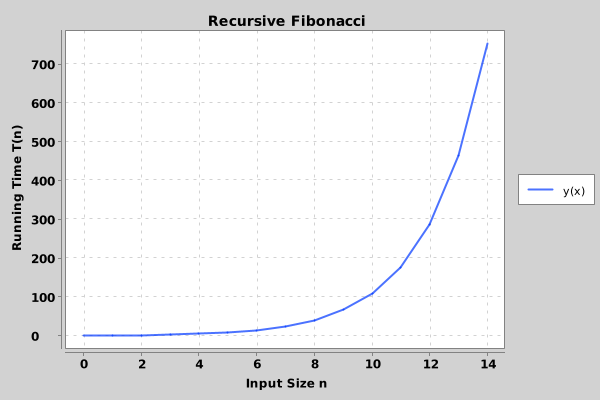

In [12]:
// proof that maxFindTrack works
size = 15;
int[] steps = new int[size+1];
for (int i = 1; i < steps.length; i++) {
    steps[i] = fibonacciRecursiveTrack(i);
}
printArr(steps);

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// steps - convert int to double for plotting
double[] yData = new double[size];
for (int i = 0; i < yData.length; i++) {
    yData[i] = steps[i];
}

// plot it
XYChart chart = QuickChart.getChart("Recursive Fibonacci", "Input Size n", "Running Time T(n)", "y(x)", xData, yData);
BitmapEncoder.getBufferedImage(chart);

# Do it yourself

Can you plot the input size against the running time of iterative fibonacci? You will need to:

1. Modify iterative fibonacci method so you can track its running time
2. Plot its input size against the running time. You can reuse the code in the above cell.
3. (Optional) Compare the running time of recursive and iterative fibonacci in the same plot. You can reuse the code for plotting different scenarios of maxFind running time.

**When you finish (or not) playing your exploration of the whole interactive notebook and DIY assignment, you should download a html file and upload it to the assignment box on Canvas:**

* File --> Download as --> HTML (.html)

![download](images/html.png)